In [1]:
from IPython.display import Image

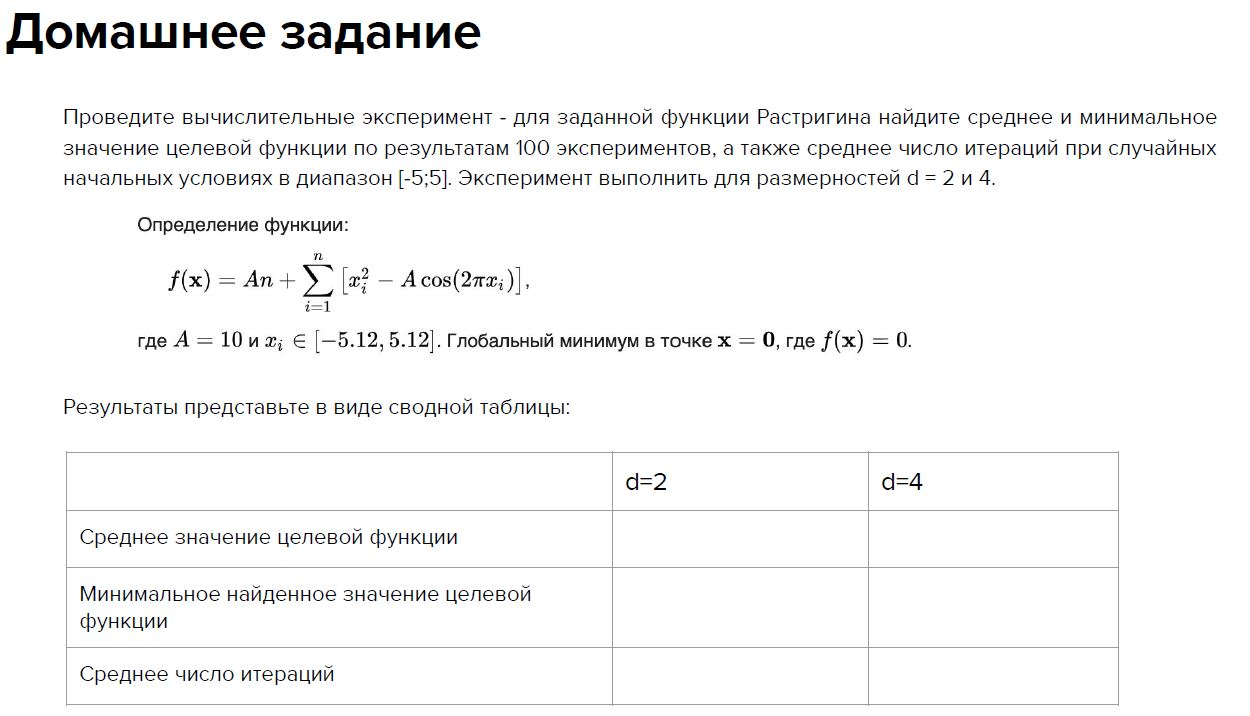

In [2]:
Image("C:\Мои занятия\Нетология\Математика для DS(18)\Лекция 6\hw.JPG")

In [28]:
import numpy as np
import pandas as pd
import math

In [29]:
def rastrigin(X):
    A = 10
    return A*len(X) + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])

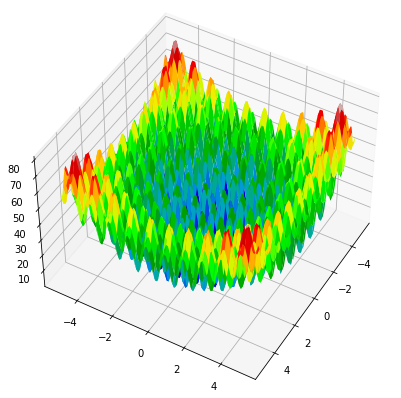

In [30]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=[10, 7])
ax = fig.gca(projection='3d') 
ax.view_init(45, 30)

X = np.linspace(-5.12, 5.12, 100)     
Y = np.linspace(-5.12, 5.12, 100)     
X, Y = np.meshgrid(X, Y)

Z = rastrigin([X, Y])

ax.plot_surface(X, Y, Z, cmap=cm.nipy_spectral)    
plt.show()

In [31]:
from scipy.optimize import minimize

In [32]:
itList_2 = [];
resList_2 = [];

for kk in range(100):
    x0 = np.random.uniform(low=-5, high=5, size=(2,))
    res = minimize(rastrigin, x0, method='nelder-mead', options={'xtol':1e-8, 'disp': False})
    itList_2.append(res.nit)
    resList_2.append(rastrigin(res.x))

itList_4 = [];
resList_4 = [];

for kk in range(100):
    x0 = np.random.uniform(low=-5, high=5, size=(4,))
    res = minimize(rastrigin, x0, method='nelder-mead', options={'xtol':1e-8, 'disp': False})
    itList_4.append(res.nit)
    resList_4.append(rastrigin(res.x))

In [33]:
summary_table = pd.DataFrame({'Параметр': ['Среднее значение целевой функции', 
                                'Минимальное найденное значение целевой функции', 
                                'Среднее число итераций'], 
                   'd = 2': [round(np.mean(resList_2), 4), round(np.min(resList_2), 4), int(np.mean(itList_2))], 
                   'd = 4': [round(np.mean(resList_4), 4),round(np.min(resList_4), 4), int(np.mean(itList_4))]})

summary_table

,Параметр,d = 2,d = 4
0,Среднее значение целевой функции,15.6606,35.6392
1,Минимальное найденное значение целевой функции,0.0000,3.9798
2,Среднее число итераций,62.0000,184.0000
